In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import data_cleaning
import review_score_analysis
import price_range_analysis
import SonyaHelperFunctions
import importlib


In [40]:
# Data Cleaning:

# Adjust as needed, these dataframes are big. No, really
chunk_size = 10_000


# Using these functions, we select businesses marked with the category "restaurant" (case insensitive) and select
# the restaurants with 30 or more reviews, leaving out any restaurants with fewer than that.
restaurants_df = data_cleaning.filter_business_data("data/yelp_academic_dataset_business.json", chunk_size)

# From here, we clean the reviews data by removing any reviews of businesses that aren't in our restaurants_df Dataframe.
reviews_df = data_cleaning.filter_review_data("data/yelp_academic_dataset_review.json", restaurants_df, chunk_size)

In [4]:
# unfilteredUsers=pd.DataFrame()

# userReviewReader=pd.read_json("data/yelp_academic_dataset_user.json", lines=True, chunksize=50000)
# for chunk in userReviewReader:
#     unfilteredUsers = pd.concat([unfilteredUsers, chunk])

In [5]:
# unfilteredReviews.head()

In [6]:
# select the relevant columns for grouping
businessStars=reviews_df[["business_id", "stars"]]
# businessStars.head()
groupedReviews=businessStars.groupby("business_id").mean()
groupedReviews.head()

,stars
business_id,
--ZVrH2X2QXBFdCilbirsw,4.722222
--epgcb7xHGuJ-4PUeSLAw,2.868421
-09Oc2D14vRnmirPh0vlXw,3.021898
-0EdehHjIQc0DtYU8QcAig,3.138889
-0FX23yAacC4bbLaGPvyxw,3.588571


In [7]:
groupedReviewsDF=groupedReviews.reset_index()
groupedReviewsDF=groupedReviewsDF.rename(columns={"business_id": "business_id", "stars" : "average_stars"})
groupedReviewsDF.head()
# join to add average stars to each business.
restaurantsWithAverageStars=pd.merge(restaurants_df, groupedReviewsDF, how="inner", on="business_id")
restaurantsWithAverageStars.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,average_stars
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",4.386792
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",4.200000
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",4.317308
4,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",3.825000


In [8]:
droppedAttributes=restaurantsWithAverageStars.copy(deep=True)
droppedAttributes=droppedAttributes.dropna(subset="attributes")
# droppedAttributes.head()


# pricedRestaurants=droppedAttributes[(droppedAttributes["attributes"].apply(lambda x: "PriceRange2" in x.keys()))]
# pricedRestaurants.head()
# droppedAttributes.info()

In [9]:
priceRangeList=[]

for entry in droppedAttributes["attributes"]:
    priceRangeList.append(entry.get("RestaurantsPriceRange2"))

In [10]:
droppedAttributes["PriceRange"]=priceRangeList
# droppedAttributes.info()

In [11]:
restaurantsWithPriceRanges=droppedAttributes.dropna(subset="PriceRange")
restaurantsWithPriceRanges=restaurantsWithPriceRanges[restaurantsWithPriceRanges["PriceRange"]!="None"]
# restaurantsWithPriceRanges.info()

C:\Users\Alzier\AppData\Local\Temp\ipykernel_13764\1947786549.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes=sns.boxplot(data=restaurantsWithPriceRanges, x="PriceRange", y="average_stars", palette="mako")


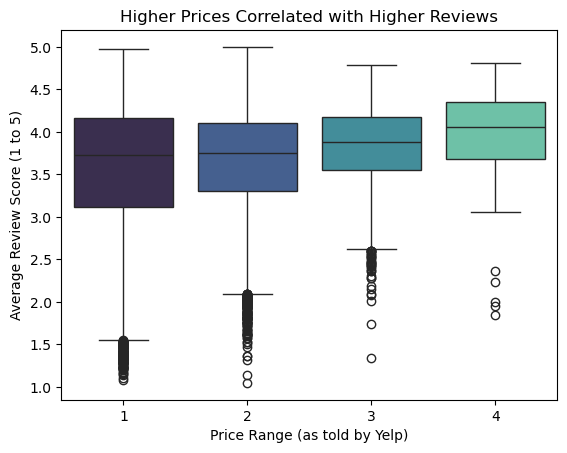

In [12]:
axes=sns.boxplot(data=restaurantsWithPriceRanges, x="PriceRange", y="average_stars", palette="mako")
axes.set_xlabel("Price Range (as told by Yelp)")
axes.set_ylabel("Average Review Score (1 to 5)")
plt.title("Higher Prices Correlated with Higher Reviews")
plt.show()

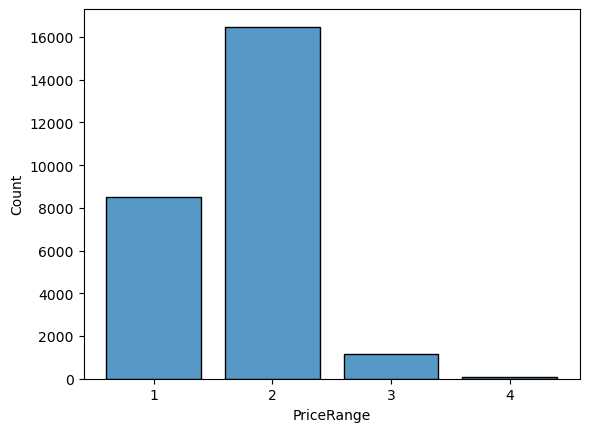

In [13]:
sns.histplot(data=restaurantsWithPriceRanges, x="PriceRange", shrink=.8)
plt.show()

In [14]:
groupedPriceRanges=restaurantsWithPriceRanges[["average_stars", "PriceRange"]].groupby(["PriceRange"]).mean()
groupedPriceRanges.head()

,average_stars
PriceRange,
1,3.558280
2,3.668735
3,3.819725
4,3.952671


In [25]:
restaurantsWithPriceRanges.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,average_stars,PriceRange
0,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ...",4.057471,1
1,0bPLkL0QhhPO5kt1_EXmNQ,Zio's Italian Market,2575 E Bay Dr,Largo,FL,33771,27.916116,-82.760461,4.5,100,0,"{'OutdoorSeating': 'False', 'RestaurantsGoodFo...","Food, Delis, Italian, Bakeries, Restaurants","{'Monday': '10:0-18:0', 'Tuesday': '10:0-20:0'...",4.386792,1
2,MUTTqe8uqyMdBl186RmNeA,Tuna Bar,205 Race St,Philadelphia,PA,19106,39.953949,-75.143226,4.0,245,1,"{'RestaurantsReservations': 'True', 'Restauran...","Sushi Bars, Restaurants, Japanese","{'Tuesday': '13:30-22:0', 'Wednesday': '13:30-...",4.200000,2
3,ROeacJQwBeh05Rqg7F6TCg,BAP,1224 South St,Philadelphia,PA,19147,39.943223,-75.162568,4.5,205,1,"{'NoiseLevel': 'u'quiet'', 'GoodForMeal': '{'d...","Korean, Restaurants","{'Monday': '11:30-20:30', 'Tuesday': '11:30-20...",4.317308,1
4,WKMJwqnfZKsAae75RMP6jA,Roast Coffeehouse and Wine Bar,10359 104 Street NW,Edmonton,AB,T5J 1B9,53.546045,-113.499169,4.0,40,0,"{'OutdoorSeating': 'False', 'Caters': 'True', ...","Coffee & Tea, Food, Cafes, Bars, Wine Bars, Re...","{'Monday': '8:0-18:0', 'Tuesday': '8:0-18:0', ...",3.825000,2


In [63]:
# categoryDict={ }

# for ls in restaurantsWithPriceRanges["categories"]:
# #    print(ls)
#     newList=ls.split(", ")
#     for entry in newList:
# #        print(entry)
#         if entry not in categoryDict.keys():
#             categoryDict.update({entry : 1})
# print(categoryDict.keys())

In [64]:
importlib.reload(helper_functions)
testDF=helper_functions.get_best_restaurants(restaurantsWithPriceRanges, category="Japanese", neighborhood="test", price_range=3)
testDF.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,average_stars,PriceRange
22475,OUmZYqNbOj-ZgVsnWH8-0g,Toyosu Sushi & Poke,422 Germantown Pike,Lafayette Hill,PA,19444,40.092044,-75.260998,5.0,50,1,"{'RestaurantsTableService': 'False', 'Restaura...","Hawaiian, Poke, Japanese, Food, Restaurants, S...","{'Monday': '0:0-0:0', 'Tuesday': '12:0-20:0', ...",4.903846,2
6165,rqmSwgI-ZDsQhyJQpDIDZA,Ice Point Cafe,"1113 Murfreesboro Rd, Ste 115",Franklin,TN,37064,35.918465,-86.838377,5.0,87,1,"{'BikeParking': 'True', 'WheelchairAccessible'...","Sushi Bars, Juice Bars & Smoothies, Restaurant...","{'Monday': '10:0-20:0', 'Tuesday': '10:0-20:0'...",4.851064,2
17514,SFN5g5eexukcaZkzoiYQYg,Kounter Kulture,3825 Watson Rd,St. Louis,MO,63109,38.595124,-90.301432,5.0,329,1,"{'RestaurantsReservations': 'False', 'BikePark...","Korean, Asian Fusion, Salad, Japanese, Soup, R...",{'Monday': '0:0-0:0'},4.834302,2
4196,GIAgyEwEQITK7wZI_vhXIA,Bangin' Curry Franklin,1670 Washington Ave,Philadelphia,PA,19146,39.938374,-75.171071,5.0,77,0,"{'Alcohol': 'u'none'', 'RestaurantsTakeOut': '...","Food Trucks, Restaurants, Food Court, Japanese...","{'Monday': '0:0-0:0', 'Saturday': '12:0-19:0'}",4.797468,1
18203,i5X5dshedNVztWO9_o6Dsw,Little Ninja Thai Japanese Food & Cafe,5709 6th St,Zephyrhills,FL,33542,28.240509,-82.186892,5.0,130,1,"{'BusinessAcceptsCreditCards': 'True', 'NoiseL...","Restaurants, Noodles, Thai, Japanese, Beer, Wi...","{'Monday': '16:30-19:45', 'Tuesday': '16:30-19...",4.772059,2


In [63]:
newRestaurantsWithAverageStars=SonyaHelperFunctions.make_restaurants_with_avg_stars(reviews_df, restaurants_df)
newRestaurantsWithAverageStars.head()


,business_id,avg_review_score,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,XQfwVwDr-v0ZS3_CbbE5Xw,3.068571,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,YjUWPpI6HXG530lwP-fb2A,3.458333,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None
2,kxX2SOes4o-D3ZQBkiMRfA,4.184211,Zaika,2481 Grant Ave,Philadelphia,PA,19114,40.079848,-75.025080,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
3,e4Vwtrqf-wpJfwesgvdgxQ,4.114286,Melt,2549 Banks St,New Orleans,LA,70119,29.962102,-90.087958,32,0,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."
4,04UD14gamNjLY0IDYVhHJg,3.954225,Dmitri's,795 S 3rd St,Philadelphia,PA,19147,39.938013,-75.148131,273,0,"{'BusinessParking': '{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."


In [64]:
importlib.reload(SonyaHelperFunctions)

<module 'SonyaHelperFunctions' from 'C:\\Users\\Alzier\\Desktop\\DataScience\\YelpProject\\Yelp JSON\\group-project-better-late-than-never\\SonyaHelperFunctions.py'>

In [65]:
priceRangeDF=SonyaHelperFunctions.add_price_range_to_df(newRestaurantsWithAverageStars)
priceRangeDF.head()

,PriceRange,business_id,avg_review_score,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,2,XQfwVwDr-v0ZS3_CbbE5Xw,3.068571,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,1,YjUWPpI6HXG530lwP-fb2A,3.458333,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None
2,2,kxX2SOes4o-D3ZQBkiMRfA,4.184211,Zaika,2481 Grant Ave,Philadelphia,PA,19114,40.079848,-75.025080,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
3,2,e4Vwtrqf-wpJfwesgvdgxQ,4.114286,Melt,2549 Banks St,New Orleans,LA,70119,29.962102,-90.087958,32,0,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."
4,2,04UD14gamNjLY0IDYVhHJg,3.954225,Dmitri's,795 S 3rd St,Philadelphia,PA,19147,39.938013,-75.148131,273,0,"{'BusinessParking': '{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."


C:\Users\Alzier\Desktop\DataScience\YelpProject\Yelp JSON\group-project-better-late-than-never\SonyaHelperFunctions.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



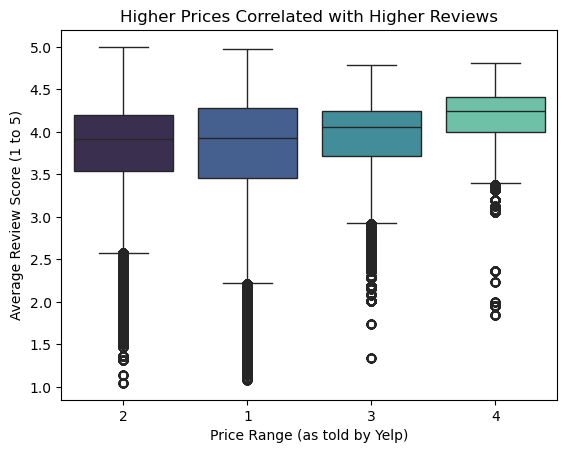

In [66]:
SonyaHelperFunctions.show_price_plot(priceRangeDF)

In [42]:
tempDF=newRestaurantsWithAverageStars.drop(columns=["review_id","user_id", "text", "date", "stars_x", "useful", "funny", "cool", "stars_y"])
tempDF.head()

,business_id,avg_review_score,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,XQfwVwDr-v0ZS3_CbbE5Xw,3.068571,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,YjUWPpI6HXG530lwP-fb2A,3.458333,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None
2,kxX2SOes4o-D3ZQBkiMRfA,4.184211,Zaika,2481 Grant Ave,Philadelphia,PA,19114,40.079848,-75.025080,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
3,e4Vwtrqf-wpJfwesgvdgxQ,4.114286,Melt,2549 Banks St,New Orleans,LA,70119,29.962102,-90.087958,32,0,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."
4,04UD14gamNjLY0IDYVhHJg,3.954225,Dmitri's,795 S 3rd St,Philadelphia,PA,19147,39.938013,-75.148131,273,0,"{'BusinessParking': '{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."


In [43]:
droppedAttributes=tempDF.copy(deep=True)
droppedAttributes=droppedAttributes.dropna(subset="attributes")

In [44]:
droppedAttributes.head()

,business_id,avg_review_score,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,XQfwVwDr-v0ZS3_CbbE5Xw,3.068571,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,YjUWPpI6HXG530lwP-fb2A,3.458333,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None
2,kxX2SOes4o-D3ZQBkiMRfA,4.184211,Zaika,2481 Grant Ave,Philadelphia,PA,19114,40.079848,-75.025080,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
3,e4Vwtrqf-wpJfwesgvdgxQ,4.114286,Melt,2549 Banks St,New Orleans,LA,70119,29.962102,-90.087958,32,0,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."
4,04UD14gamNjLY0IDYVhHJg,3.954225,Dmitri's,795 S 3rd St,Philadelphia,PA,19147,39.938013,-75.148131,273,0,"{'BusinessParking': '{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."


In [45]:
priceRangeList=[]

for entry in droppedAttributes["attributes"]:
    priceRangeList.append(entry.get("RestaurantsPriceRange2"))

In [46]:
droppedAttributes.insert(0, "PriceRange", priceRangeList)
droppedAttributes.head()

,PriceRange,business_id,avg_review_score,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,2,XQfwVwDr-v0ZS3_CbbE5Xw,3.068571,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,1,YjUWPpI6HXG530lwP-fb2A,3.458333,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None
2,2,kxX2SOes4o-D3ZQBkiMRfA,4.184211,Zaika,2481 Grant Ave,Philadelphia,PA,19114,40.079848,-75.025080,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
3,2,e4Vwtrqf-wpJfwesgvdgxQ,4.114286,Melt,2549 Banks St,New Orleans,LA,70119,29.962102,-90.087958,32,0,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."
4,2,04UD14gamNjLY0IDYVhHJg,3.954225,Dmitri's,795 S 3rd St,Philadelphia,PA,19147,39.938013,-75.148131,273,0,"{'BusinessParking': '{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."


In [47]:
newRestaurantsWithPriceRanges=droppedAttributes.dropna(subset="PriceRange")
newRestaurantsWithPriceRanges=newRestaurantsWithPriceRanges[newRestaurantsWithPriceRanges["PriceRange"]!="None"]
restaurantsWithPriceRanges.head()

,PriceRange,business_id,avg_review_score,name,address,city,state,postal_code,latitude,longitude,review_count,is_open,attributes,categories,hours
0,2,XQfwVwDr-v0ZS3_CbbE5Xw,3.068571,Turning Point of North Wales,1460 Bethlehem Pike,North Wales,PA,19454,40.210196,-75.223639,169,1,"{'NoiseLevel': 'u'average'', 'HasTV': 'False',...","Restaurants, Breakfast & Brunch, Food, Juice B...","{'Monday': '7:30-15:0', 'Tuesday': '7:30-15:0'..."
1,1,YjUWPpI6HXG530lwP-fb2A,3.458333,Kettle Restaurant,748 W Starr Pass Blvd,Tucson,AZ,85713,32.207233,-110.980864,47,1,"{'RestaurantsReservations': 'True', 'BusinessP...","Restaurants, Breakfast & Brunch",None
2,2,kxX2SOes4o-D3ZQBkiMRfA,4.184211,Zaika,2481 Grant Ave,Philadelphia,PA,19114,40.079848,-75.025080,181,1,"{'Caters': 'True', 'Ambience': '{'romantic': F...","Halal, Pakistani, Restaurants, Indian","{'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21..."
3,2,e4Vwtrqf-wpJfwesgvdgxQ,4.114286,Melt,2549 Banks St,New Orleans,LA,70119,29.962102,-90.087958,32,0,"{'BusinessParking': '{'garage': False, 'street...","Sandwiches, Beer, Wine & Spirits, Bars, Food, ...","{'Monday': '0:0-0:0', 'Friday': '11:0-17:0', '..."
4,2,04UD14gamNjLY0IDYVhHJg,3.954225,Dmitri's,795 S 3rd St,Philadelphia,PA,19147,39.938013,-75.148131,273,0,"{'BusinessParking': '{'garage': False, 'street...","Mediterranean, Restaurants, Seafood, Greek","{'Wednesday': '17:30-21:0', 'Thursday': '17:30..."


C:\Users\Alzier\AppData\Local\Temp\ipykernel_19828\618231048.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  axes=sns.boxplot(data=newRestaurantsWithPriceRanges, x="PriceRange", y="avg_review_score", palette="mako")


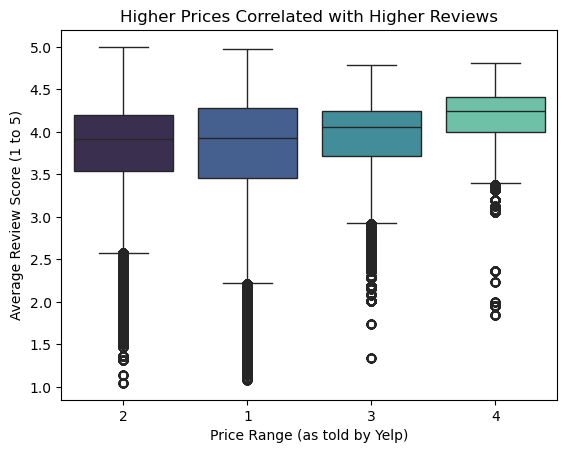

In [48]:

axes=sns.boxplot(data=newRestaurantsWithPriceRanges, x="PriceRange", y="avg_review_score", palette="mako")
axes.set_xlabel("Price Range (as told by Yelp)")
axes.set_ylabel("Average Review Score (1 to 5)")
plt.title("Higher Prices Correlated with Higher Reviews")
plt.show()